In [1]:
import os
import vflow
from flujo_1D import build_gwf, plot_results

In [2]:
def flujo_1d(ncol):
    mesh = vflow.MeshDis(
        nrow = 1,    # Number of rows
        ncol = ncol,  # Number of columns
        nlay = 1,    # Number of layers
        row_length = 12.0,    # Length of system ($cm$)
        column_length = 0.1,  # Length of system ($cm$)
        top = 1.0,   # Top of the model ($cm$)
        bottom = 0,  # Layer bottom elevation ($cm$)
    )
    
    tparams = dict(nper = 1,  # Number of periods
                   total_time = 120.0,  # Simulation time ($s$)
                   nstp = 1.0,   # Number of time steps
                   tsmult = 1.0  # Multiplier for the length of successive time steps.
                  )
    
    model_units = {"time": "seconds",
                   "length": "centimeters"}
    
    pparams = dict(hydraulic_conductivity = 0.01,  # Hydraulic conductivity ($cm s^{-1}$)
                   specific_discharge = 0.1,  # Specific discharge ($cm s^{-1}$)
                   source_concentration = 1.0  # Source concentration (unitless)
                  )
    
    os_params = dict(ws = os.getcwd(), # Ruta de donde estamos actualmente
                     mf6_exe = '/home/jovyan/GMMC/WMA/mf6/bin/mf6', # Ejecutable
                     name = 'flow', # Nombre de la simulación
                     head_file = "flow.hds", 
                     budget_file = "flow.bud"
                    )

    sim, gwf = build_gwf(mesh, tparams, pparams, model_units, os_params)
    sim.write_simulation(silent=True)
    sim.run_simulation(silent=True)
    plot_results(gwf, mesh, os_params)

24.599999999999888 1.0


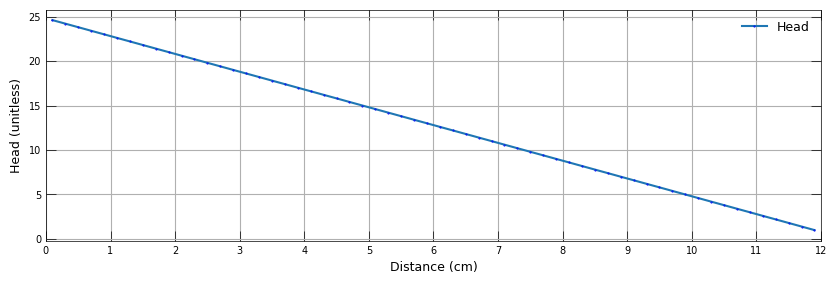

In [5]:
flujo_1d(60)

In [6]:
import ipywidgets as widgets
widgets.interactive(flujo_1d,
                    ncol = widgets.IntSlider(min=12, max = 120, step = 10, value=120))

/opt/conda/lib/python3.11/site-packages/ipywidgets/widgets/interaction.py:43: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  from ipykernel.pylab.backend_inline import flush_figures


interactive(children=(IntSlider(value=120, description='ncol', max=120, min=12, step=10), Output()), _dom_clas…